# Task 6: House Price Prediction

## Objective
The objective of this project is to predict house prices using:
- Square footage (sqft_living)
- Number of bedrooms (bedrooms)
- Location (statezip)

Target Variable:
- price

This task applies regression modeling techniques to estimate house prices.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("house price.csv")
df.head()

## Step 2: Data Preprocessing

Selected Features:
- sqft_living
- bedrooms
- statezip (Location)
- price (Target)

Handled missing values and encoded categorical variable.

In [4]:
# Select required columns
df = df[['sqft_living', 'bedrooms', 'statezip', 'price']]

# Drop missing values
df.dropna(inplace=True)

df.head()

,sqft_living,bedrooms,statezip,price
0,1340,3.0,WA 98133,313000.0
1,3650,5.0,WA 98119,2384000.0
2,1930,3.0,WA 98042,342000.0
3,2000,3.0,WA 98008,420000.0
4,1940,4.0,WA 98052,550000.0


In [5]:
df = pd.get_dummies(df, columns=['statezip'], drop_first=True)

## Step 3: Define Features (X) and Target (y)

In [6]:
X = df.drop("price", axis=1)
y = df["price"]

## Step 4: Train-Test Split (80% Train, 20% Test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 5: Feature Scaling

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 6: Train Linear Regression Model


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

## Step 7: Evaluate Linear Regression Model

In [10]:
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)


Linear Regression MAE: 162404.65871437851
Linear Regression RMSE: 983881.7876464144


## Step 8: Visualization – Linear Regression Predictions

We will create:
1. Line plot of actual vs predicted prices
2. Scatter plot of actual vs predicted prices

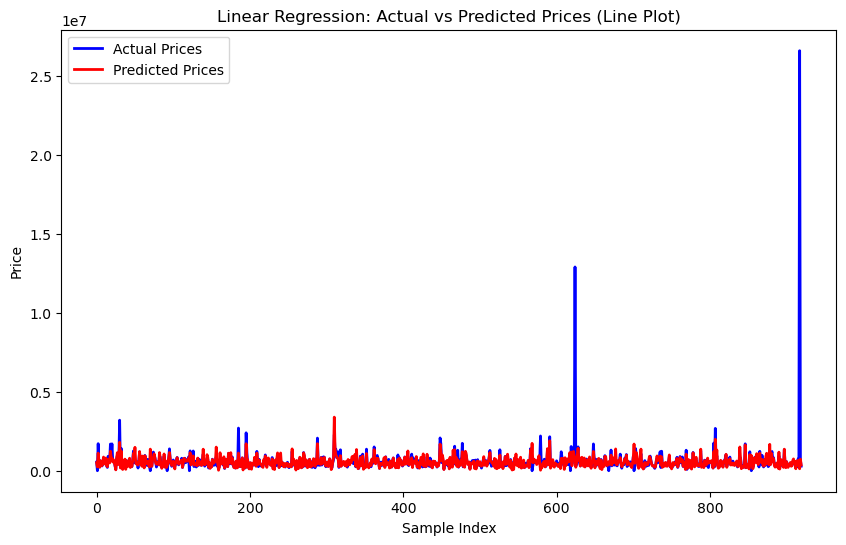

In [16]:
# Line Plot: Actual vs Predicted Prices
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Prices", color='blue', linewidth=2)
plt.plot(lr_pred, label="Predicted Prices", color='red', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Linear Regression: Actual vs Predicted Prices (Line Plot)")
plt.legend()
plt.show()


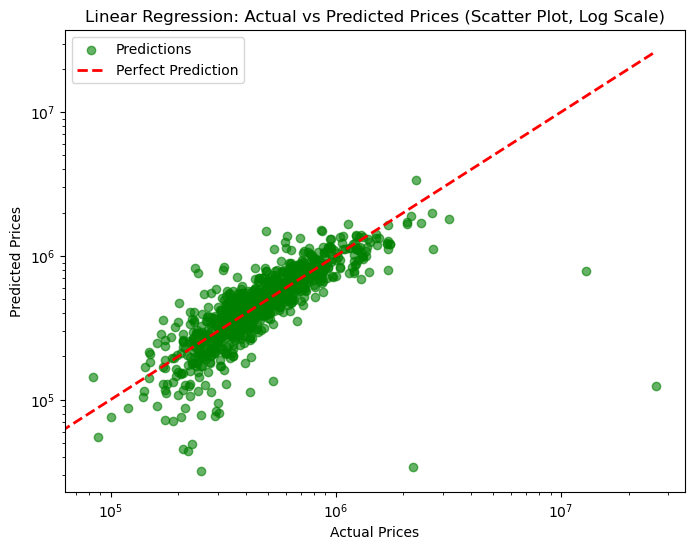

In [14]:
# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices (Scatter Plot, Log Scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()